In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle
import math




In [ ]:
df = pd.read_csv('/content/SeoulBikeData.csv',encoding='latin1')

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8736 non-null   float64
 9   Rainfall(mm)               8718 non-null   float64
 10  Snowfall (cm)              8742 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

df.isnull().sum()

In [ ]:
df.isnull().sum()

Date                          0
Rented Bike Count             0
Hour                          0
Temperature(°C)               0
Humidity(%)                   0
Wind speed (m/s)              0
Visibility (10m)              0
Dew point temperature(°C)     0
Solar Radiation (MJ/m2)      24
Rainfall(mm)                 42
Snowfall (cm)                18
Seasons                       0
Holiday                       0
Functioning Day               0
dtype: int64

In [ ]:
df["Seasons"].replace(["Winter","Spring","Summer","Autumn"], [1,2,3,4], inplace=True)

<ipython-input-276-6e821c5d50f9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


<Axes: >

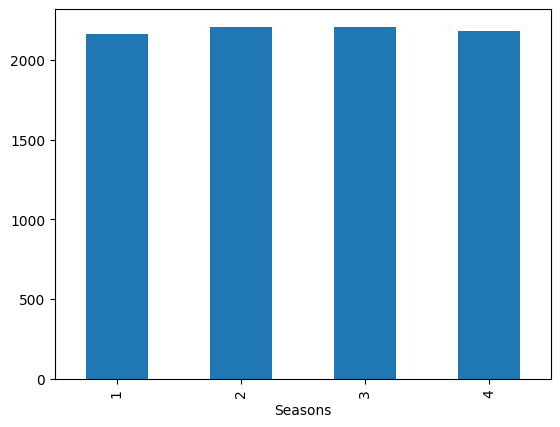

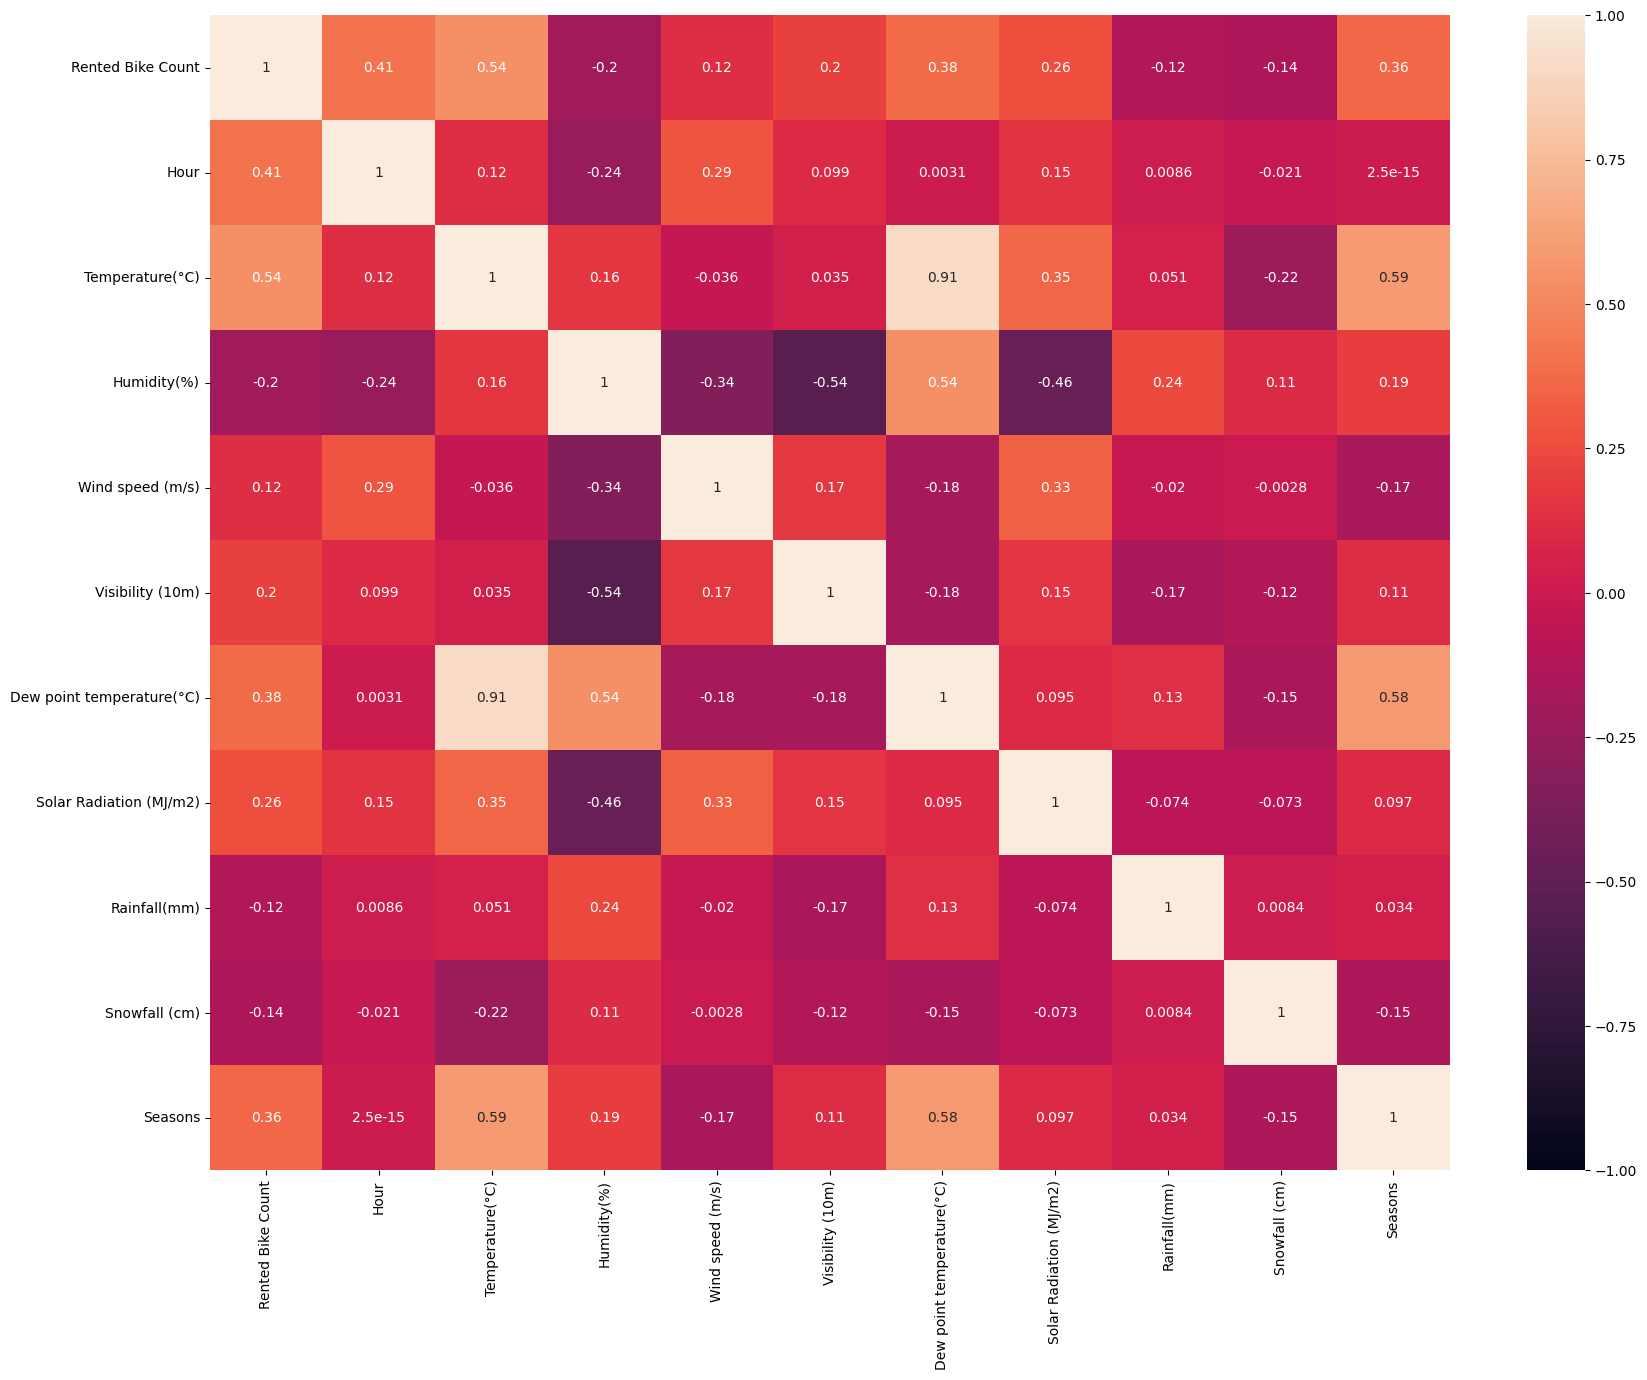

In [ ]:
df.groupby(["Seasons"]).size().plot(kind="bar")
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

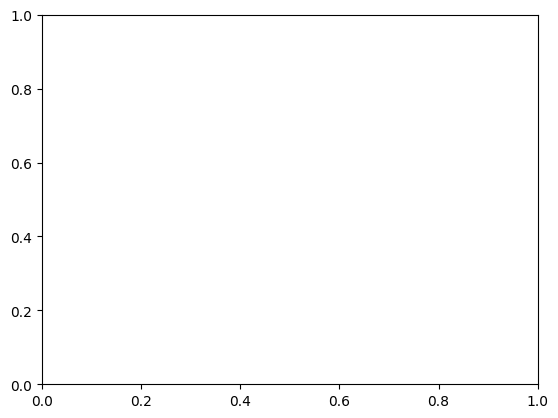

In [ ]:
df_split = np.array_split(df, 4)
CX = []
CY = []
old_CX = []
old_CY = []

for i in df_split:
  CY.append(i["Dew point temperature(°C)"].mean())
  CX.append(i["Temperature(°C)"].mean())

def calc_dist_of_each_point_to_each_centroid():
  for i in new_df.index:
    new_df.loc[i, "Error0"] = dist(new_df.loc[i, "Temperature(°C)"], CX[0], new_df.loc[i, "Dew point temperature(°C)"], CY[0])
    new_df.loc[i, "Error1"] = dist(new_df.loc[i, "Temperature(°C)"], CX[1], new_df.loc[i, "Dew point temperature(°C)"], CY[1])
    new_df.loc[i, "Error2"] = dist(new_df.loc[i, "Temperature(°C)"], CX[2], new_df.loc[i, "Dew point temperature(°C)"], CY[2])
    new_df.loc[i, "Error3"] = dist(new_df.loc[i, "Temperature(°C)"], CX[3], new_df.loc[i, "Dew point temperature(°C)"], CY[3])

def select_new_centroids():
  c = [[], [], [], []]
  for i in new_df.index:
    temp = [new_df.loc[i, "Error0"], new_df.loc[i, "Error1"], new_df.loc[i, "Error2"], new_df.loc[i, "Error3"]]
    temp.sort()
    if new_df.loc[i, "Error0"] == temp[0]:
      c[0].append({"x": new_df.loc[i, "Temperature(°C)"], "y": new_df.loc[i, "Dew point temperature(°C)"]})
    elif new_df.loc[i, "Error1"] == temp[0]:
      c[1].append({"x": new_df.loc[i, "Temperature(°C)"], "y": new_df.loc[i, "Dew point temperature(°C)"]})
    elif new_df.loc[i, "Error2"] == temp[0]:
      c[2].append({"x": new_df.loc[i, "Temperature(°C)"], "y": new_df.loc[i, "Dew point temperature(°C)"]})
    else:
      c[3].append({"x": new_df.loc[i, "Temperature(°C)"], "y": new_df.loc[i, "Dew point temperature(°C)"]})

  index = 0
  for i in c:
    if len(i) > 0:
      sumx = sum(j["x"] for j in i)
      sumy = sum(j["y"] for j in i)
      avgx = sumx / len(i)
      avgy = sumy / len(i)
      CX[index] = avgx
      CY[index] = avgy
    else:
      # Handle the case when len(i) is zero
      CX[index] = 0
      CY[index] = 0
    index += 1

  return c

def converged():
  convergence=True
  for i in range(0,4):
    if abs(old_CX[i]-CX[i])>0.3 or abs(old_CY[i]-CY[i])>0.3:
      convergence=False
      break
  return convergence
calc_dist_of_each_point_to_each_centroid()
old_CX=CX.copy()
old_CY=CY.copy()
clusters=select_new_centroids()
while not converged():
  calc_dist_of_each_point_to_each_centroid()
  old_CX=CX.copy()
  old_CY=CY.copy()
  select_new_centroids()
clusters1=[{"x":[],"y":[]},{"x":[],"y":[]},{"x":[],"y":[]},{"x":[],"y":[]}]
row_index=0
for i in clusters:
  for j in i:
    clusters1[row_index]["x"].append(j["x"])
    clusters1[row_index]["y"].append(j["y"])
  row_index +=1
clusters1
fig = plt.figure()
ax1 = fig.add_subplot(111)


In [ ]:
ax1.scatter(clusters1[0]["x"], clusters1[0]["y"], s=10, c='b', marker="s")
ax1.scatter(clusters1[1]["x"], clusters1[1]["y"], s=10, c='r', marker="o")
ax1.scatter(clusters1[2]["x"], clusters1[2]["y"], s=10, c='g', marker="^")
ax1.scatter(clusters1[3]["x"], clusters1[3]["y"], s=10, c='m', marker="P")
plt.show()
